In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Converting categorical column into numerical

In [8]:
df['Genre'] = pd.get_dummies(df['Genre'],drop_first = True)

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=8,random_state = 40)

In [12]:
kmeans.fit(df)

KMeans(random_state=40)

In [19]:
kmeans.labels_

array([6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 1, 5, 1, 1,
       1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [42]:
a =df.iloc[-1]

In [43]:
a= list(a)

In [44]:
kmeans.predict([a])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

In [45]:
kmeans.cluster_centers_

array([[144.        ,   0.42857143,  33.14285714,  75.0952381 ,
         82.76190476],
       [ 61.97435897,   0.43589744,  46.97435897,  46.17948718,
         49.35897436],
       [182.        ,   0.5       ,  43.5       ,  99.88888889,
         19.88888889],
       [102.4047619 ,   0.38095238,  40.33333333,  61.30952381,
         49.42857143],
       [183.        ,   0.5       ,  32.16666667,  99.88888889,
         81.38888889],
       [ 23.09090909,   0.40909091,  25.27272727,  25.72727273,
         79.36363636],
       [ 20.        ,   0.4       ,  43.9       ,  24.45      ,
         19.1       ],
       [144.        ,   0.55      ,  37.6       ,  75.4       ,
         17.5       ]])

In [46]:
kmeans.inertia_

86053.67444777445

In [69]:
wcss=[]
for i in range(3,9):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [70]:
wcss

[271396.5629660315,
 195401.19855991466,
 157505.72072477572,
 122608.33779954852,
 103254.45765901907,
 86053.67444777445]

### Visulaization

In [71]:
import matplotlib.pyplot as plt

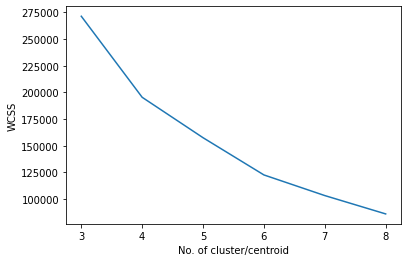

In [75]:
plt.plot([3,4,5,6,7,8], wcss)
plt.xlabel("No. of cluster/centroid")
plt.ylabel("WCSS")
plt.show()

#### Insight : WCSS is minimus at k=8

## Evaluation Metrics

In [76]:
from sklearn.metrics import silhouette_score

In [77]:
silhouette_score(df,kmeans.labels_)

0.40550215828085007